# EDA_FE 과제
#### <font color='orange'> - 약간 매운맛

by YBIGTA 16기 DA Team 김지환

<img src='https://i.imgur.com/cqdVyfs.jpg'>


---
여러분은 Airbnb 런던 지사의 데이터 분석가입니다.

이번에 호스트들에게 적정한 방 가격을 책정해주는 프로젝트를 진행할 예정입니다.

이를 위해 기존에 런던에 있던 Airbnb 방 데이터를 분석할 것입니다.

각 문제에 대해 적절한 코드 혹은 답변을 제시해보세요.

---

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 코드. 버전에 따라 필요 없을 수도 있습니다.
import seaborn as sns

In [15]:
df = pd.read_csv('airbnb_listings.csv', index_col=0)

C:\Users\USER\AppData\Local\Temp\ipykernel_29780\577296706.py:1: DtypeWarning: Columns (25,26,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('airbnb_listings.csv', index_col=0)


# EDA

### 1) 전체 데이터 확인

- #### <font color='orange'> Q1. 상위 5개의 데이터를 확인해보세요. 컬럼 수가 많으니 모든 컬럼을 표시하도록 조정하세요. </font>

In [16]:
# Q1 
top_5 = df[:5]
top_5

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,2060,a few days or more,22%,50%,f,0.0,0.0,['reviews'],t,f,...,NaN,f,NaN,NaN,f,f,flexible,f,f,0.01
1,2595,within a day,87%,38%,f,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,...,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,0.38
2,3831,within an hour,83%,96%,f,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,...,8.0,f,NaN,NaN,f,f,moderate,f,f,4.71
3,5099,NaN,NaN,71%,f,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,...,9.0,f,NaN,NaN,f,f,moderate,t,t,0.59
4,5114,within a day,50%,NaN,f,3.0,3.0,"['email', 'phone', 'reviews']",t,f,...,10.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,0.56


---
### 2) 결측치 확인

- #### <font color='orange'> Q2. 각 컬럼의 결측치를 확인하고, 결측치가 많은 순서대로 결측치 비율과 함께 표로 나타내보세요.
<font color='orange'> (결측치 0개인 컬럼은 나타내지 마세요)

In [21]:
# Q2
null_count = df.info()
display(null_count)

<class 'pandas.core.frame.DataFrame'>
Index: 50796 entries, 0 to 50795
Data columns (total 54 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                50796 non-null  int64  
 1   host_response_time                31790 non-null  object 
 2   host_response_rate                31790 non-null  object 
 3   host_acceptance_rate              36781 non-null  object 
 4   host_is_superhost                 50791 non-null  object 
 5   host_listings_count               50791 non-null  float64
 6   host_total_listings_count         50791 non-null  float64
 7   host_verifications                50791 non-null  object 
 8   host_has_profile_pic              50791 non-null  object 
 9   host_identity_verified            50791 non-null  object 
 10  neighborhood                      50796 non-null  object 
 11  latitude                          50796 non-null  float64
 12  longitude

None

In [36]:
# Q2

raw_count = (df.isnull().sum()).sort_values(ascending=False)
modified_count = raw_count[raw_count > 0]

null_ratio = (modified_count / len(df) *100).sort_values(ascending=False).round(1)

null_dataframe = pd.DataFrame({'Null Count': modified_count, 'Null (%)': null_ratio})
display(null_dataframe)

,Null Count,Null (%)
jurisdiction_names,50781,100.0
license,50759,99.9
square_feet,50407,99.2
monthly_price,46119,90.8
weekly_price,45411,89.4
host_response_time,19006,37.4
host_response_rate,19006,37.4
security_deposit,17325,34.1
host_acceptance_rate,14015,27.6
review_scores_value,11482,22.6


- #### <font color='orange'> Q3. 결측치가 있는 컬럼과 결측치 비율을 보기쉽게 그래프로 나타내 보세요.

In [44]:
null_dataframe['Null (%)']

jurisdiction_names             100.0
license                         99.9
square_feet                     99.2
monthly_price                   90.8
weekly_price                    89.4
host_response_time              37.4
host_response_rate              37.4
security_deposit                34.1
host_acceptance_rate            27.6
review_scores_value             22.6
review_scores_location          22.6
review_scores_checkin           22.6
review_scores_accuracy          22.6
review_scores_communication     22.6
review_scores_cleanliness       22.5
review_scores_rating            22.5
reviews_per_month               20.6
beds                             0.9
bedrooms                         0.2
bathrooms                        0.1
host_identity_verified           0.0
host_has_profile_pic             0.0
host_verifications               0.0
host_total_listings_count        0.0
host_listings_count              0.0
host_is_superhost                0.0
Name: Null (%), dtype: float64

C:\Users\USER\AppData\Local\Temp\ipykernel_29780\1514295146.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  null_plot = sns.barplot(x=null_dataframe.index, y=null_dataframe['Null (%)'], palette= 'Reds_r')
C:\Users\USER\AppData\Local\Temp\ipykernel_29780\1514295146.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  null_plot.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=8, ha='right')


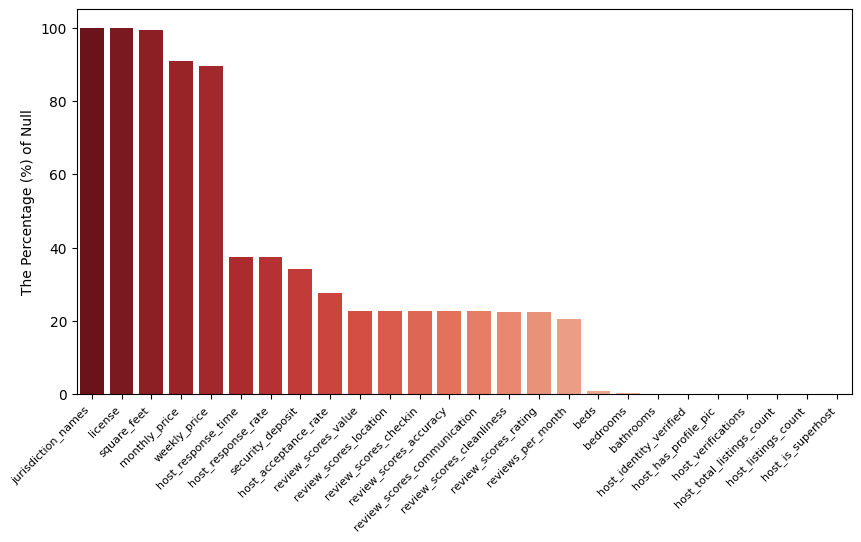

In [85]:
#plt.bar(null_dataframe.index, null_dataframe['Null (%)'])
#plt.ylabel('The Percentage(%) of Null')
#plt.xticks(rotation=45, fontsize = 8, ha='right')
#plt.show()

null_plot = sns.barplot(x=null_dataframe.index, y=null_dataframe['Null (%)'], palette= 'Reds_r')
null_plot.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=8, ha='right')
null_plot.set_ylabel('The Percentage (%) of Null')
null_plot.set_xlabel(None)
null_plot.figure.set_size_inches(10, 5)

- #### <font color='orange'> Q4. 결측치가 적은 beds 컬럼을 좀 더 자세히 살펴보겠습니다.
  #### <font color='orange'> 'beds' 컬럼이 결측치인 데이터의 상위 5개를 출력해주세요.

In [79]:
beds_detail = df[df['beds'].isnull() == True].head(5)
beds_detail

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
808,321845,NaN,NaN,NaN,f,0.0,0.0,['email'],t,f,...,NaN,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,NaN
1002,468613,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,...,NaN,f,NaN,NaN,f,f,flexible,f,f,NaN
1058,499249,NaN,NaN,0%,f,1.0,1.0,"['email', 'phone', 'reviews', 'offline_governm...",t,f,...,10.0,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,0.01
1074,505231,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'reviews']",t,f,...,10.0,f,NaN,NaN,f,f,moderate,f,f,0.01
1208,587519,NaN,NaN,0%,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,...,6.0,f,NaN,NaN,f,f,flexible,f,f,0.02


---
### 3) 범주형 변수 확인
<font color='gray'> - 편의를 위해 결측치가 있는 컬럼을 모두 제거하고 진행하겠습니다.

In [80]:
drop_col = ['jurisdiction_names', 'license', 'square_feet', 'monthly_price',
       'weekly_price', 'host_response_rate', 'host_response_time',
       'security_deposit', 'host_acceptance_rate', 'review_scores_location',
       'review_scores_value', 'review_scores_checkin',
       'review_scores_accuracy', 'review_scores_communication',
       'review_scores_cleanliness', 'review_scores_rating',
       'reviews_per_month', 'beds']

In [81]:
df = df.drop(columns=drop_col)

- #### 각 컬럼별 변수 타입 확인

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50796 entries, 0 to 50795
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                50796 non-null  int64  
 1   host_is_superhost                 50791 non-null  object 
 2   host_listings_count               50791 non-null  float64
 3   host_total_listings_count         50791 non-null  float64
 4   host_verifications                50791 non-null  object 
 5   host_has_profile_pic              50791 non-null  object 
 6   host_identity_verified            50791 non-null  object 
 7   neighborhood                      50796 non-null  object 
 8   latitude                          50796 non-null  float64
 9   longitude                         50796 non-null  float64
 10  is_location_exact                 50796 non-null  object 
 11  property_type                     50796 non-null  object 
 12  room_type

- #### <font color='orange'> Q5. Room Type 에는 어떤 것들이 있는지 살펴보겠습니다.
#### <font color='orange'> room_type의 종류별 갯수에 대한 그래프를 그려주세요.

C:\Users\USER\AppData\Local\Temp\ipykernel_29780\1433910609.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  room_type_barplot = sns.barplot(x=room_type.index, y=room_type, palette='pastel', order=room_order )


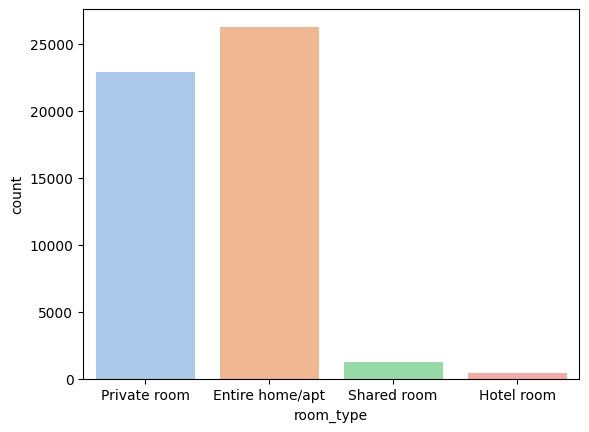

In [90]:
room_type = df['room_type'].value_counts()

room_order = ['Private room', 'Entire home/apt', 'Shared room', 'Hotel room']
room_type_barplot = sns.barplot(x=room_type.index, y=room_type, palette='pastel', order=room_order )

- #### <font color='orange'> Q6. 위 그래프의 세로축이 갯수가 아닌 비율을 나타내도록 재구성해보세요.

C:\Users\USER\AppData\Local\Temp\ipykernel_29780\3817253940.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  room_type_barplot = sns.barplot(x=room_type.index, y=room_type, palette='pastel')


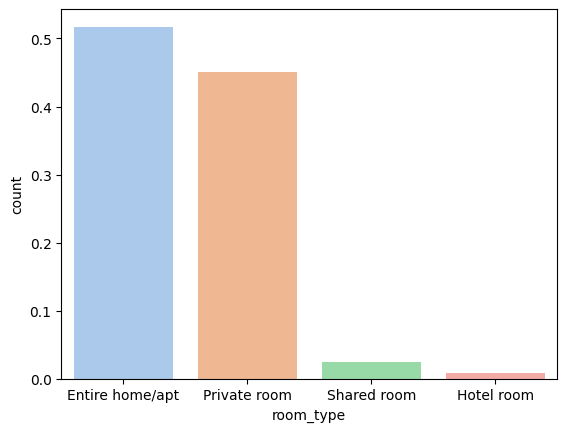

In [92]:
room_type = (df['room_type'].value_counts())/len(df)

room_type_barplot = sns.barplot(x=room_type.index, y=room_type, palette='pastel')


- #### <font color='orange'> Q7. 각 지역별로 room_type의 비율이 어땠는 지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 room_type의 갯수가 어땠는지 보여주세요.    

In [97]:
df.columns

Index(['id', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighborhood',
       'latitude', 'longitude', 'is_location_exact', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'bed_type',
       'amenities', 'price', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'requires_license', 'instant_bookable', 'is_business_travel_ready',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification'],
      dtype='object')

<Figure size 1200x500 with 0 Axes>

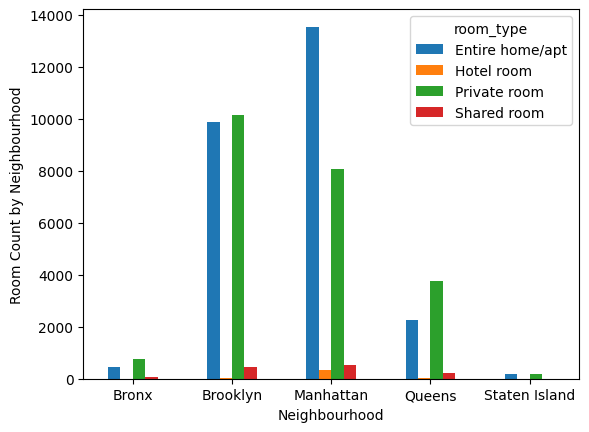

<Figure size 1200x500 with 0 Axes>

In [164]:
df[['neighborhood', 'room_type']].groupby(['neighborhood','room_type']).size().unstack().plot(kind='bar')
plt.ylabel('Room Count by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.xticks(rotation=0)
plt.figure(figsize=(12,5))



- #### <font color='orange'> Q8. 각 지역별로 가격의 분포가 어떤지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 가격의 분포를 보여주세요.

In [140]:
df.columns

Index(['id', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighborhood',
       'latitude', 'longitude', 'is_location_exact', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'bed_type',
       'amenities', 'price', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'requires_license', 'instant_bookable', 'is_business_travel_ready',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification'],
      dtype='object')

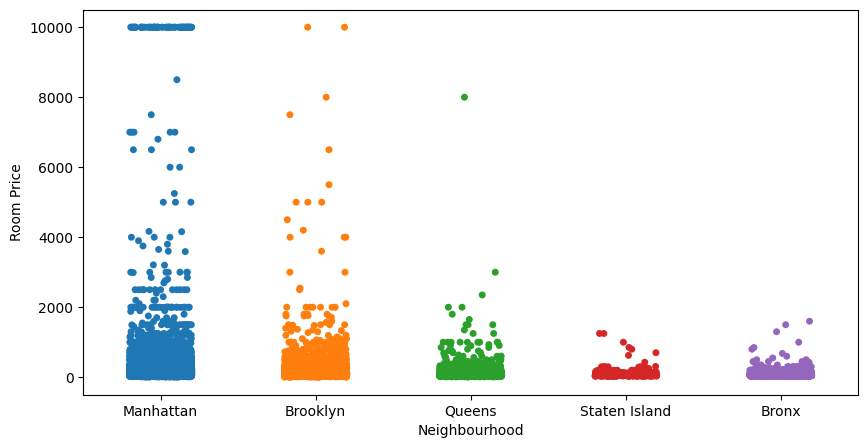

In [173]:
plt.figure(figsize=(10, 5))
sns.stripplot( x = "neighborhood", y = "price", hue='neighborhood', data = df, jitter = 0.2)
plt.xlabel('Neighbourhood')
plt.ylabel('Room Price')
plt.show()

- #### <font color='orange'> Q9. 위 그래프들로부터 알 수 있는 사실은 무엇인가요? 그 이유는 무엇이라고 생각하시나요?

1) Manhattan, Brooklyn은 room price distribution이 Queens, Staten Island, and Bronx보다 넓고 다양하다. 

--> Manhattan, Brooklyn은 New York City의 가장 densely populated 한 urban centre에 위치해있고, 따라서 room type count 뿐만 아니라 값이 비싼 entire apt/home이 압도적으로 많았기때문에 room price가 높고 더 range가 넓게 distribute되어있다.

2) Queens의 room price는 거의 $4000불 밑이 대부분이고 $8000 outlier가 하나 있다 

--> Queens는 Manhattan 혹은 Brooklyn만큼 urbanised 된 neighbourhood은 아니지만 그래도 population이 어느정도 concentred되어있지만 room type distribution/count가 세번째로 낮은편이다.

3) Staten Island나 Bronx의 room price range는 다 $2000 밑이다

--> Staten Island와 Bronx의 room type count/distribution 을 보았을때 굉장히 modestly populated 된 neighbourhood이란걸 알수있다. 

---
### 4) 연속형 변수 확인

- #### <font color='orange'> Q10. 각 방의 수용가능인원의 분포를 알고싶습니다.
#### <font color='orange'> 'accommodates' 칼럼에 대한 히스토그램을 그려주세요.

Text(0, 0.5, 'Room Count')

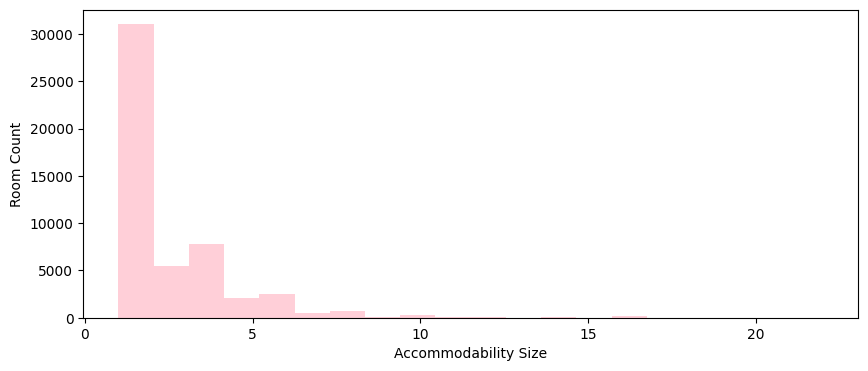

In [179]:
plt.figure(figsize=(10, 4))
sns.histplot(df['accommodates'], bins=20, kde=False, color='pink', edgecolor='none')
plt.xlabel('Accommodability Size')
plt.ylabel('Room Count')

- #### <font color='orange'> Q11. 각 방의 가격의 분포를 알고 싶습니다.
#### <font color='orange'> 'price' 칼럼에 대한 히스토그램을 그려주세요. 범위는 0~1000까지만 보여주세요.

Text(0, 0.5, 'Room Count')

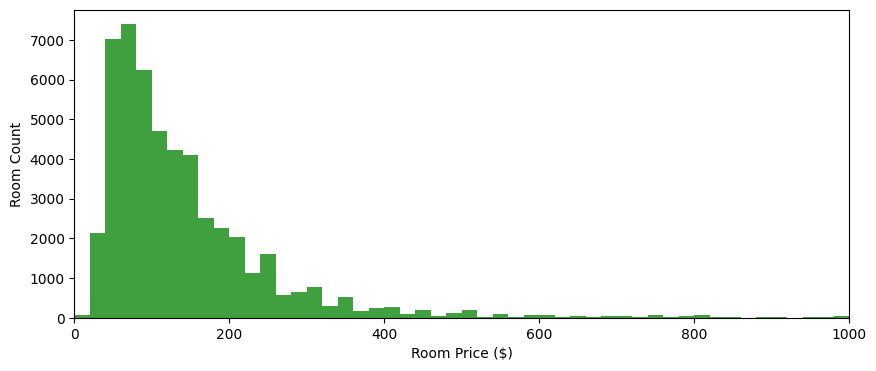

In [459]:
plt.figure(figsize=(10, 4))
sns.histplot(df['price'], bins=500, kde=False, color='green', edgecolor='none')
plt.xlim(0,1000)
plt.xlabel('Room Price ($)')
plt.ylabel('Room Count')

* **굵은 텍스트** Q3 hint

<font color='white'> x축 라벨을 45도 기울이려면 plot.set_xticklabels()을 찾아보세요. </font>



---
### 5) Feature Engineering

feature에 대한 전처리를 하기 이전에 결측치가 있는 column을 모두 제거했는데, 다시 초기 상태로 되돌리고 진행하겠습니다.

In [462]:
df = pd.read_csv('airbnb_listings.csv', index_col=0)
df

C:\Users\USER\AppData\Local\Temp\ipykernel_29780\3560383730.py:1: DtypeWarning: Columns (25,26,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('airbnb_listings.csv', index_col=0)


,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,2060,a few days or more,22%,50%,f,0.0,0.0,['reviews'],t,f,...,NaN,f,NaN,NaN,f,f,flexible,f,f,0.01
1,2595,within a day,87%,38%,f,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,...,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,0.38
2,3831,within an hour,83%,96%,f,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,...,8.0,f,NaN,NaN,f,f,moderate,f,f,4.71
3,5099,NaN,NaN,71%,f,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,...,9.0,f,NaN,NaN,f,f,moderate,t,t,0.59
4,5114,within a day,50%,NaN,f,3.0,3.0,"['email', 'phone', 'reviews']",t,f,...,10.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,0.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50791,42890680,within an hour,100%,100%,f,5.0,5.0,"['email', 'phone', 'offline_government_id', 's...",t,f,...,NaN,f,NaN,NaN,t,f,flexible,f,f,NaN
50792,42890730,within an hour,100%,99%,f,21.0,21.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,...,NaN,f,NaN,NaN,t,f,flexible,f,f,NaN
50793,42891018,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'jumio', 'offline_governmen...",t,f,...,NaN,f,NaN,NaN,t,f,flexible,f,f,NaN
50794,42891637,NaN,NaN,100%,f,2.0,2.0,"['email', 'phone', 'offline_government_id', 'g...",t,f,...,NaN,f,NaN,NaN,f,f,flexible,f,f,NaN


- #### <font color='orange'> Q12. 결측치에 대한 처리를 하고 싶습니다.
#### <font color='orange'> 주어진 모든 column들에 대하여 결측치가 25%이상인 경우에는 column을 drop하고 10%이상 25%미만인 경우에는 결측치가 있는 row만 drop하고, 10%미만인 경우에는 중앙값으로 대체해주세요.

In [463]:
#Q12

def null_replace(df):
    for column in df.columns:

        null_calculation = (df[column].isnull().sum())/len(df[column])*100

        print(f"Column: {column}, Null Percentage: {null_calculation}%")

        if null_calculation >= 25:
            df = df.drop(columns=column)
            print(f"Dropping column: {column}")
        elif 10 <= null_calculation < 25:
            print(f"Dropping rows in column: {column}")
            df = df.dropna(subset=[column])
            print(column, df[column])
        else:
            if isinstance(df[column], int):
                df[column] = df[column].fillna(df[column].median())
            else:
                continue
    return df

df_new = null_replace(df)
df_new
    

Column: id, Null Percentage: 0.0%
Column: host_response_time, Null Percentage: 37.41633199464525%
Dropping column: host_response_time
Column: host_response_rate, Null Percentage: 37.41633199464525%
Dropping column: host_response_rate
Column: host_acceptance_rate, Null Percentage: 27.59075517757304%
Dropping column: host_acceptance_rate
Column: host_is_superhost, Null Percentage: 0.009843294747617923%
Column: host_listings_count, Null Percentage: 0.009843294747617923%
Column: host_total_listings_count, Null Percentage: 0.009843294747617923%
Column: host_verifications, Null Percentage: 0.009843294747617923%
Column: host_has_profile_pic, Null Percentage: 0.009843294747617923%
Column: host_identity_verified, Null Percentage: 0.009843294747617923%
Column: neighborhood, Null Percentage: 0.0%
Column: latitude, Null Percentage: 0.0%
Column: longitude, Null Percentage: 0.0%
Column: is_location_exact, Null Percentage: 0.0%
Column: property_type, Null Percentage: 0.0%
Column: room_type, Null Perc

,id,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,latitude,longitude,...,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,2060,f,0.0,0.0,['reviews'],t,f,Manhattan,40.85722,-73.93790,...,NaN,NaN,NaN,f,f,f,flexible,f,f,0.01
1,2595,f,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,Manhattan,40.75362,-73.98377,...,10.0,10.0,9.0,f,f,f,strict_14_with_grace_period,t,t,0.38
2,3831,f,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,Brooklyn,40.68514,-73.95976,...,10.0,10.0,8.0,f,f,f,moderate,f,f,4.71
3,5099,f,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,Manhattan,40.74767,-73.97500,...,10.0,10.0,9.0,f,f,f,moderate,t,t,0.59
4,5114,f,3.0,3.0,"['email', 'phone', 'reviews']",t,f,Manhattan,40.71910,-73.99040,...,10.0,10.0,10.0,f,f,f,strict_14_with_grace_period,f,f,0.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50490,42750206,f,0.0,0.0,"['phone', 'offline_government_id', 'selfie', '...",t,f,Queens,40.74024,-73.82093,...,10.0,10.0,10.0,f,t,f,moderate,f,f,1.00
50526,42762152,f,1.0,1.0,"['email', 'phone']",t,f,Brooklyn,40.68645,-73.93803,...,10.0,10.0,10.0,f,t,f,flexible,f,f,1.00
50598,42794256,f,0.0,0.0,"['email', 'phone', 'offline_government_id', 's...",t,f,Manhattan,40.83212,-73.94180,...,10.0,10.0,10.0,f,f,f,strict_14_with_grace_period,f,f,2.00
50650,42816035,f,10.0,10.0,"['email', 'phone', 'jumio', 'offline_governmen...",t,f,Manhattan,40.76166,-73.99113,...,10.0,10.0,10.0,f,f,f,strict_14_with_grace_period,f,f,1.00


- #### <font color='orange'> Q13. 앞서 진행한 EDA를 바탕으로 FE를 진행하고자 합니다..
#### <font color='orange'> 총 3개의 FE를 진행하시고, 해당 FE를 진행한 이유에 대해 **간단히** 작성해주세요.


In [464]:
#Q13-1)

import numpy as np

# Indicator Variable: Creating a new price category that categorises the price into high, medium, and low range by each neighbourhood's quartile
# Intoducted a new price category indicator variable because the price range is different for each neighbourhood

def price_category(df):
    for column in df.columns:
        if column == 'price':
            high = df['price'].quantile(0.75)
            low = df['price'].quantile(0.25)

            if (df['price'] != 0).any():
                df['price_category'] = np.where(df['price'] >= high, 'high',
                                            np.where(df['price'] <= low, 'low', 'medium'))
            else:
                continue
    return df

df_new = df.groupby('neighborhood').apply(price_category)
df_new  = df_new.reset_index(drop=True)
df_new.groupby(['neighborhood', 'price_category']).size()

neighborhood   price_category
Bronx          high                319
               low                 324
               medium              606
Brooklyn       high               5178
               low                5550
               medium             9727
Manhattan      high               5691
               low                5751
               medium            11006
Queens         high               1590
               low                1676
               medium             3000
Staten Island  high                 95
               low                 102
               medium              181
dtype: int64

In [465]:
df_2 = df

In [466]:
#Q13-2)

# Label Encoding: converting the host_response_time variable into numerical variables
# For improved computational efficiency. Used label encoding instead of one-hot encoding due to the variable's ordinal nature

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df_2['host_response_time'] = df_2['host_response_time'].map({'within an hour': 0,
                                                          'within a few hours': 1,
                                                          'within a day': 2,
                                                          'a few days or more':3,
                                                          'NaN': 4})

df_2['host_response_time_encoded'] = encoder.fit_transform(df_2['host_response_time'])

df_2['host_response_time_encoded'].value_counts()

host_response_time_encoded
0    20445
4    19006
1     6009
2     4218
3     1118
Name: count, dtype: int64

In [498]:
# Refreshing the dataset 

df = pd.read_csv('airbnb_listings.csv', index_col=0)

C:\Users\USER\AppData\Local\Temp\ipykernel_29780\577296706.py:1: DtypeWarning: Columns (25,26,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('airbnb_listings.csv', index_col=0)


In [499]:
#Q13-3)

# Selecting core features that are most related to the review_scores_rating of each Airbnb room based on the value of Pearson's correlation coefficient
# Used Pearson's correlation coefficient to determine the strength of variable relationships

df_x = df.drop(columns = ['review_scores_rating'], axis=1)
df_x = df_x.select_dtypes('int64','float64')
df_y = df['review_scores_rating']


In [500]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df_x, df_y, test_size = 0.2, random_state = 42
)

X_train.shape, X_test.shape

((40636, 12), (10160, 12))

In [501]:
# changing string percentage variables into numerical variables

#def percentage_converter(df, columns):
        #for column in columns:
                #df[column] = df[column].str.rstrip('%').astype('float')/100.0
        #return df

In [502]:
#df_test_y = percentage_converter(df_test_y, ['host_response_rate', 'host_acceptance_rate'])

In [503]:

def correlation(dataset, threshold):
    column_corr = set()
    data = pd.DataFrame(dataset).corr()
    corr_matrix = data.corr()

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                column_name = corr_matrix.columns[i]
                column_corr.add(column_name)
                
    return column_corr

In [504]:
core_features = correlation(X_train, threshold = 0.6)
core_features

{'availability_365',
 'availability_60',
 'availability_90',
 'guests_included',
 'number_of_reviews',
 'number_of_reviews_ltm'}

---

EDA는 언뜻보면 불필요해 보이는 과정이지만, 실제 데이터를 다룰때 매우매우 중요한 과정입니다.

때문에 기본적인 개념 및 시각화 방법은 숙지해 두시는 것이 좋습니다!

또한 FE를 통하여 여러분들이 실제로 필요한 모델에 필요한 변수 형태를 띄게 변수를 바꿔주는 과정 또한 필수적인 과정이니, 다양한 방법의 FE 역시 숙지해 두시는 게 좋습니다

---

* Q2 hint

<font color='white'> df의 null의 개수를 센 다음에, ".to_frame()" 을 써보세요.
1. missingnum=df.isnull().sum()으로 우선 결측치확인
2. missingnum>0조건 만족시키는 missingnum 확인하기
3. missingnum을 column으로 하는 새로운 df생성
4. 새로운 df sort하기
5. missing_%를 새로운 column으로 추가

</font>

* Q3 hint


<font color='white'> x축 라벨을 45도 기울이려면 plot.set_xticklabels()을 찾아보세요. </font>
